<a href="https://colab.research.google.com/github/MrA-png/CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Convolutional Neural Network (CNN)**

In [2]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense,Flatten, Dropout

In [3]:
#Download file yang diperlukan
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#praproses data
X = train.drop(columns=['label']).values
y = train['label'].values
X = X / 255.0
X = X.reshape(-1,28,28,1)

In [5]:
#konversi label
y = to_categorical(y)
print(f"Label size {y.shape}")

Label size (42000, 10)


In [6]:
#Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.1, random_state=0)

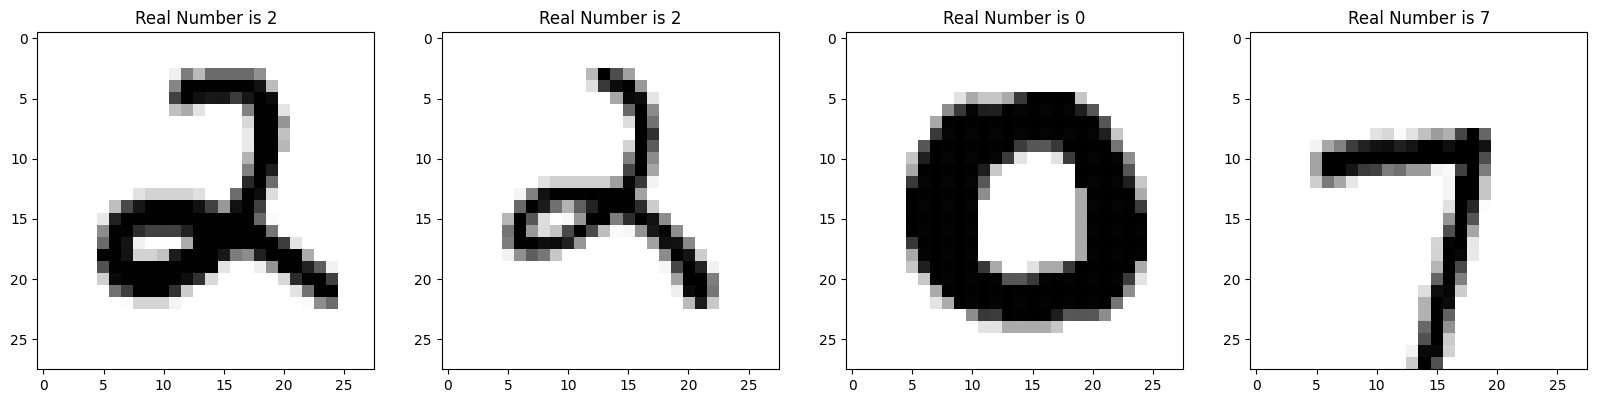

In [7]:
#Data reshape
X_train__ = X_train.reshape(X_train.shape[0], 28, 28)
fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
  ax.imshow(X_train__[i], cmap='binary')
  digit = y_train[i].argmax()
  ax.set(title = f"Real Number is {digit}");

In [8]:
#Mean and Standard Deviation
mean = np.mean(X_train)
std = np.std(X_train)
def standardize(x):
  return (x-mean)/std

In [9]:
#CNN Model

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',
input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
#Summary Model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
#Compile Model
model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=["accuracy"])

In [12]:
#Model Fit
history = model.fit(X_train, y_train,epochs=10,batch_size=128,verbose=2,validation_split=0.3)

Epoch 1/10
207/207 - 26s - 128ms/step - accuracy: 0.8401 - loss: 0.5043 - val_accuracy: 0.9626 - val_loss: 0.1243
Epoch 2/10
207/207 - 22s - 105ms/step - accuracy: 0.9585 - loss: 0.1370 - val_accuracy: 0.9731 - val_loss: 0.0851
Epoch 3/10
207/207 - 44s - 215ms/step - accuracy: 0.9723 - loss: 0.0909 - val_accuracy: 0.9787 - val_loss: 0.0695
Epoch 4/10
207/207 - 39s - 190ms/step - accuracy: 0.9779 - loss: 0.0730 - val_accuracy: 0.9793 - val_loss: 0.0654
Epoch 5/10
207/207 - 41s - 197ms/step - accuracy: 0.9829 - loss: 0.0569 - val_accuracy: 0.9799 - val_loss: 0.0622
Epoch 6/10
207/207 - 41s - 199ms/step - accuracy: 0.9848 - loss: 0.0492 - val_accuracy: 0.9842 - val_loss: 0.0552
Epoch 7/10
207/207 - 42s - 205ms/step - accuracy: 0.9879 - loss: 0.0396 - val_accuracy: 0.9843 - val_loss: 0.0523
Epoch 8/10
207/207 - 41s - 198ms/step - accuracy: 0.9890 - loss: 0.0357 - val_accuracy: 0.9862 - val_loss: 0.0468
Epoch 9/10
207/207 - 40s - 193ms/step - accuracy: 0.9906 - loss: 0.0303 - val_accuracy: 

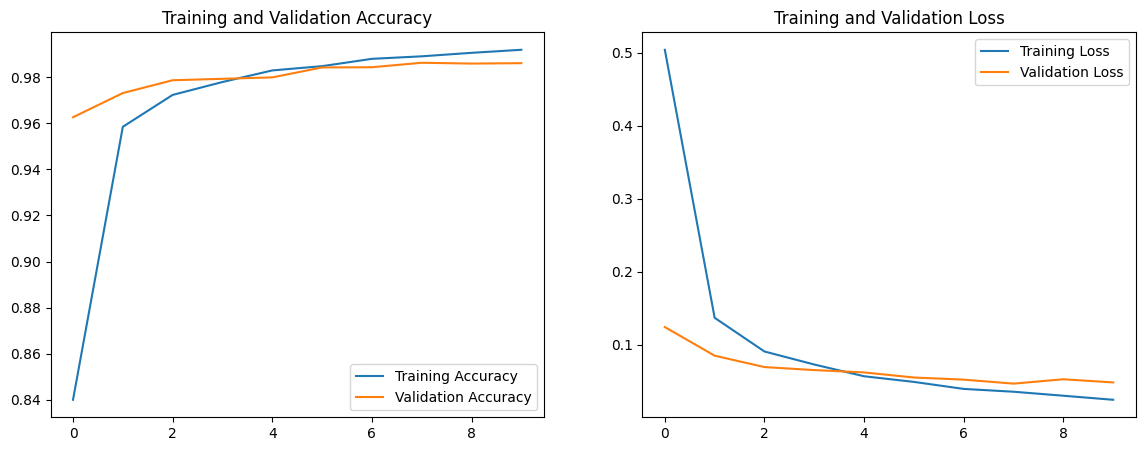

In [13]:
#Plotting
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


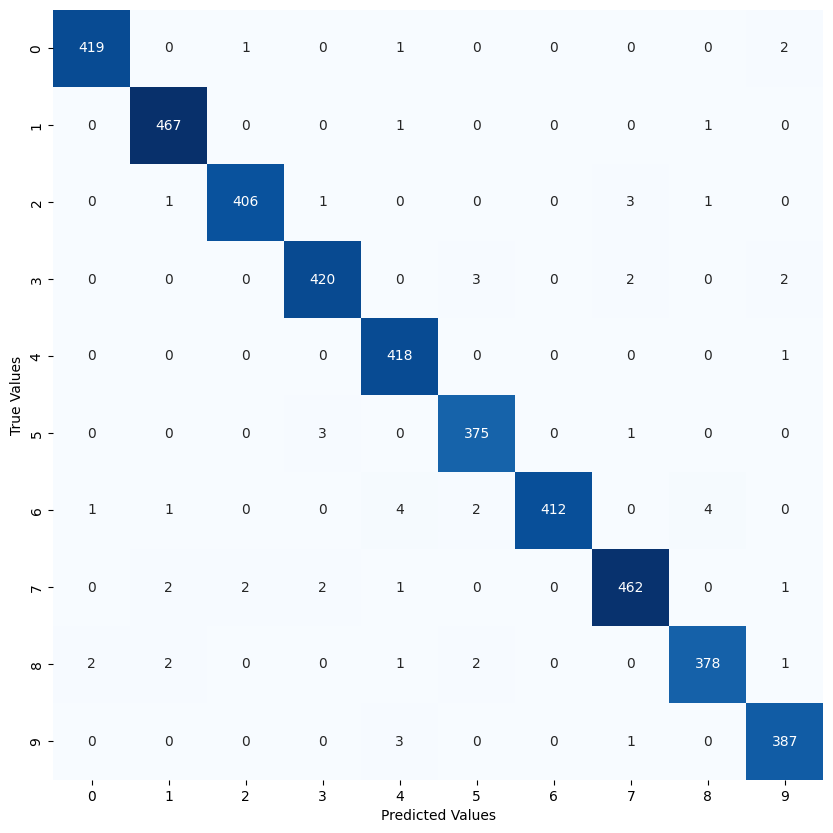

In [14]:
fig = plt.figure(figsize=(10, 10)) # Set Figure
y_pred = model.predict(X_test)
Y_pred = np.argmax(y_pred, 1)
Y_test = np.argmax(y_test, 1)
mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix
# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues,
fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [15]:
#Classification Report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       422
           1       1.00      0.99      0.99       473
           2       0.99      0.99      0.99       409
           3       0.98      0.99      0.98       426
           4       1.00      0.97      0.99       429
           5       0.99      0.98      0.99       382
           6       0.97      1.00      0.99       412
           7       0.98      0.99      0.98       469
           8       0.98      0.98      0.98       384
           9       0.99      0.98      0.99       394

    accuracy                           0.99      4200
   macro avg       0.99      0.99      0.99      4200
weighted avg       0.99      0.99      0.99      4200



In [16]:
#Evaluasi
model.evaluate(X_test, y_test, verbose=False)

[0.0459660105407238, 0.9866666793823242]

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


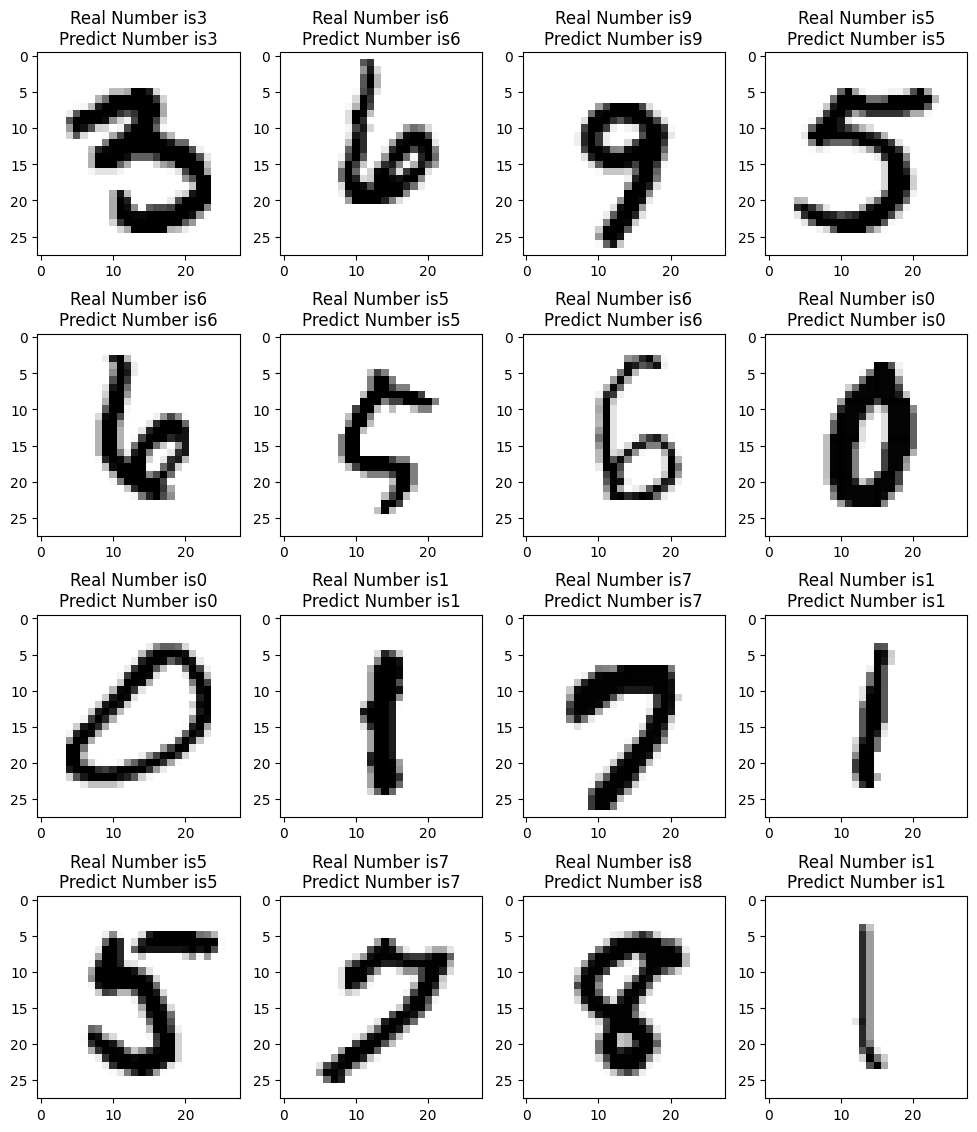

In [17]:
#Model Prediksi
y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)
fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
  ax.imshow(X_test__[i], cmap='binary')
  ax.set(title = f"Real Number is{y_test[i].argmax()}\nPredict Number is{y_pred[i].argmax()}");

875/875 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step


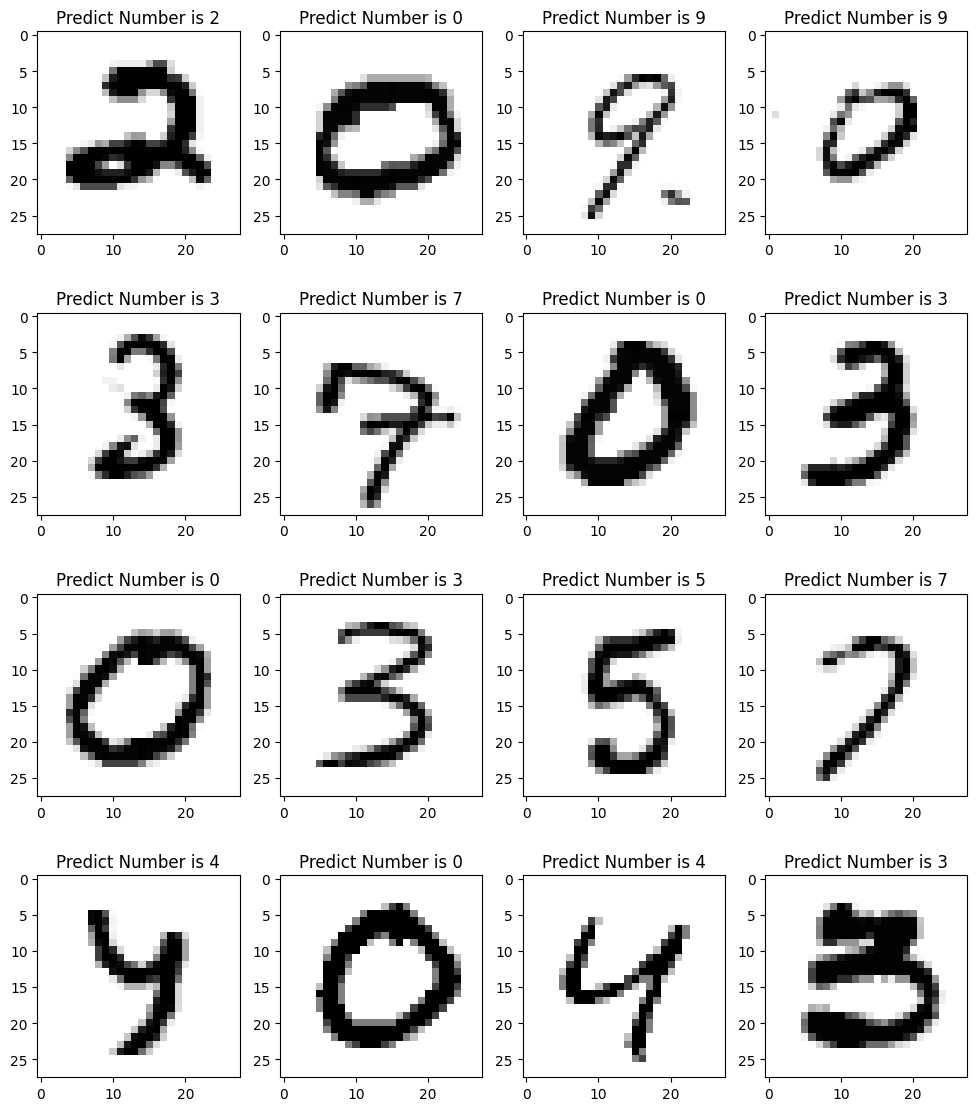

In [18]:
#Testing Our Model

test_x = test.values
test_x = test_x / 255.0
test_x = test_x.reshape(-1,28,28,1)
pred_x = model.predict(test_x)
test_x__ = test_x.reshape(test_x.shape[0], 28, 28)
fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
  ax.imshow(test_x__[i], cmap='binary')
  ax.set(title = f"Predict Number is {pred_x[i].argmax()}");

Label size (42000, 10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 233,034 (910.29 KB)

 Trainable params: 232,842 (909.54 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/20
420/420 - 36s - 86ms/step - accuracy: 0.9160 - loss: 0.2679 - val_accuracy: 0.8897 - val_loss: 0.3398
Epoch 2/20
420/420 - 36s - 85ms/step - accuracy: 0.9737 - loss: 0.0883 - val_accuracy: 0.9804 - val_loss: 0.0722
Epoch 3/20
420/420 - 39s - 93ms/step - accuracy: 0.9805 - loss: 0.0684 - val_accuracy: 0.9826 - val_loss: 0.0675
Epoch 4/20
420/420 - 41s - 96ms/step - accuracy: 0.9867 - loss: 0.0461 - val_accuracy: 0.9841 - val_loss: 0.0595
Epoch 5/20
420/420 - 41s - 97ms/step - accuracy: 0.9893 - loss: 0.0372 - val_accuracy: 0.9807 - val_loss: 0.0894
Epoch 6/20
420/420 - 41s - 98ms/step - accuracy: 0.9905 - loss: 0.0335 - val_accuracy: 0.9772 - val_loss: 0.0943
Epoch 7/20
420/420 - 42s - 99ms/step - accuracy: 0.9904 - loss: 0.0332 - val_accuracy: 0.9844 - val_loss: 0.0765


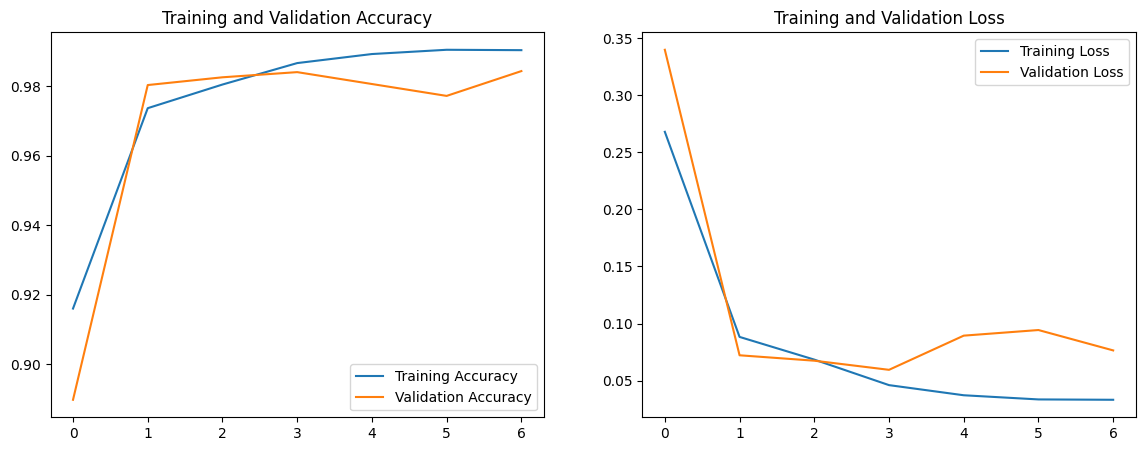

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense,Flatten, Dropout
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping

# ## **Convolutional Neural Network (CNN)**
#import library
#Download file yang diperlukan
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()
#praproses data
X = train.drop(columns=['label']).values
y = train['label'].values
X = X / 255.0
X = X.reshape(-1,28,28,1)
#konversi label
y = to_categorical(y)
print(f"Label size {y.shape}")
#Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42) # Increased test size for better evaluation

#CNN Model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization()) # Added Batch Normalization for better training stability
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization()) # Added Batch Normalization for better training stability
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2)) # Dropout to prevent overfitting
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2)) # Dropout to prevent overfitting
model.add(Dense(10, activation='softmax'))

#Summary Model
model.summary()

#Compile Model
model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=["accuracy"])

# Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

#Model Fit
history = model.fit(X_train, y_train,
                  epochs=20, # Increased epochs for better learning
                  batch_size=64, # Adjusted batch size
                  verbose=2,
                  validation_split=0.2, # Added validation split to monitor overfitting
                  callbacks=[early_stopping])

#Plotting
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# ... (rest of the code remains the same)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 233,034 (910.29 KB)

 Trainable params: 232,842 (909.54 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/20
420/420 - 38s - 91ms/step - accuracy: 0.9150 - loss: 0.2757 - val_accuracy: 0.8970 - val_loss: 0.3019
Epoch 2/20
420/420 - 41s - 99ms/step - accuracy: 0.9725 - loss: 0.0965 - val_accuracy: 0.9759 - val_loss: 0.0931
Epoch 3/20
420/420 - 40s - 95ms/step - accuracy: 0.9819 - loss: 0.0659 - val_accuracy: 0.9832 - val_loss: 0.0658
Epoch 4/20
420/420 - 40s - 96ms/step - accuracy: 0.9862 - loss: 0.0503 - val_accuracy: 0.9829 - val_loss: 0.0712
Epoch 5/20
420/420 - 35s - 83ms/step - accuracy: 0.9876 - loss: 0.0422 - val_accuracy: 0.9854 - val_loss: 0.0673
Epoch 6/20
420/420 - 40s - 96ms/step - accuracy: 0.9894 - loss: 0.0331 - val_accuracy: 0.9833 - val_loss: 0.0902


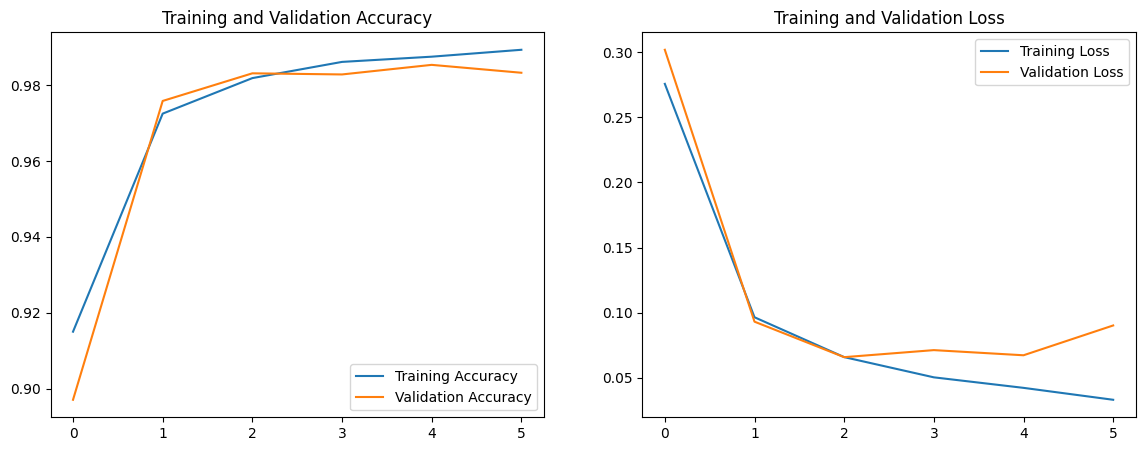

Test Loss: 0.0567
Test Accuracy: 0.9870


In [20]:

# ... (existing code)

#Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42) # Increased test size for better evaluation

#CNN Model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization()) # Added Batch Normalization for better training stability
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization()) # Added Batch Normalization for better training stability
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2)) # Dropout to prevent overfitting
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2)) # Dropout to prevent overfitting
model.add(Dense(10, activation='softmax'))

#Summary Model
model.summary()

#Compile Model
model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=["accuracy"])

# Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

#Model Fit
history = model.fit(X_train, y_train,
                  epochs=20, # Increased epochs for better learning
                  batch_size=64, # Adjusted batch size
                  verbose=2,
                  validation_split=0.2, # Added validation split to monitor overfitting
                  callbacks=[early_stopping])

#Plotting
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# ... (rest of the code remains the same)